<a href="https://colab.research.google.com/github/joshIsac/LargeLanguageModel/blob/main/2348523_LLM_CIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#question 2
# installing the requires library to create friendly chatbot
!pip install langchain
!pip install langchain_groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
#importing the libraries from langchain
from langchain_core.prompts import PromptTemplate #prompt template allows us to create an input by the user
from langchain_core.output_parsers import StrOutputParser #stroutput.parser enables us to call the function when user enters the prompt it parses the prompt
from langchain_groq import ChatGroq #it open source friendly chat model
from dotenv import load_dotenv # loading all the neccessary env variables
import os

In [26]:
#loading the dotenv
dotenv=load_dotenv

In [27]:
load_dotenv()
#getting the API KEY
api_key = "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"

In [9]:
#loading the API Model from chatgroq
groqAPI_model=ChatGroq(api_key=api_key, model_name='gemma-7b-it')


In [49]:
#Creating a prompt template
parser=StrOutputParser()
prompt = PromptTemplate(
    input_variables = ["topic"],
    template="What is {topic}?",
)

In [50]:
template={
    """
    you are a chatbot that assist in Question Answering /Poem Creation/Story Writing/ Reading
Comprehension/ Information Retrieval)
input variables: topic
output variables: answer
"""
}

In [51]:
#based on the template parser=StrOutputParser()
#  Create a chain with the prompt and parser
chainSec = prompt | groqAPI_model | parser # this enables in creating combined chain in order for the model to understand which order it goes

In [64]:
# create an interactive prompt for question and answering using the above model
while True:
  topic = input("Enter a topic or question you want ask? (or type 'quit' to exit): ")
  if topic.lower() == 'quit':
    break
  response = chainSec.invoke({"topic": topic})
  print(response)


Enter a topic or question you want ask? (or type 'quit' to exit): who is lewis hamilton?
**Lewis Hamilton** is a British racing driver of the Formula One championship. He is considered one of the greatest drivers in the history of the sport.

**Accomplishments:**

* 7 Formula One World Drivers' Championships (2008, 2014, 2015, 2017, 2018, 2019, 2020)
* 103 Formula One race wins (most all-time)
* 103 pole positions (most all-time)
* 74 fastest laps (most all-time)

**Career Highlights:**

* Became the youngest Formula One driver to win a race in 2007.
* Became the first driver to win 100 Formula One races in 2023.
* Holds the record for most consecutive race wins (7).
* Known for his remarkable speed, aggressive driving style, and unwavering determination.

**Influence and Recognition:**

* One of the most popular and marketable athletes in the world.
* Actively involved in various philanthropic endeavors, including his own Lewis Hamilton Foundation.
* A role model for young people and 

as we know this q&a generation only provide the past experiences of the data that is stored

In [62]:
#Creating a prompt template
parser=StrOutputParser()
prompt = PromptTemplate(
    input_variables = ["topic"],
    template="stories and poems on {topic}?",
)

In [63]:
#create an story telling and poem  generation using the above model
while True:
  query = input("Enter your story or poem from any literature  that invoke thoughts idea (or 'quit' to exit): ")
  if query.lower() == 'quit':
    break
  response = chainSec.invoke(query)
  print(response)

Enter your story or poem from any literature  that invoke thoughts idea (or 'quit' to exit): poem on santa claus
The moon hangs silver in the night,
Stars like diamonds, soft and light.
A shadow falls, a silent stance,
Santa Claus, a gentle dance.

Through snowy fields, on silent wings,
His reindeer team, the world they sing.
He knows each child, their hearts and fears,
Listens to whispers through the years.

With bag of gifts, so brightly bound,
He travels round, on moonlit ground.
He slips through walls, with silent stride,
Leaving joy in every stride.

He whispers words, soft and low,
"Merry Christmas, children, let the snow softly flow."
He shares the magic, wide and free,
The spirit of Christmas, for you and me.

Though some may doubt, or question true,
The magic lives, in hearts anew.
The spirit of giving, love untold,
A story whispered, ages old.

So let us celebrate, with joy ablaze,
The wonder of Santa, in silent chase.
For in the night, when moonbeams gleam,
He brings the mag

In [77]:
#question 1 a. Implement Positional Encoding (Sinusoidal Embedding with Cosine and Sine) with visualization of Dimensionality 1, 128 and 512.
import numpy as np
# inputing the dimension
dimension1=1
dimension2=128
dimension3=512
#defining a function for positional encoding for the above dimension
def positional_encoding(dimension):
  angle_rads = np.arange(dimension)[:, np.newaxis]
  angle_rads = angle_rads / np.power(10000, (2 * (np.arange(dimension) // 2)) / dimension)
  sin_rads = np.sin(angle_rads)
  cos_rads = np.cos(angle_rads)
  pos_encoding = np.concatenate([sin_rads, cos_rads], axis=-1)
  return pos_encoding



In [75]:
positional_encoding(dimension1)

array([[0., 1.]])

In [59]:
positional_encoding(dimension2)

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.84147098,  0.84147098,  0.76172041, ...,  0.99999999,
         0.99999999,  0.99999999],
       [ 0.90929743,  0.90929743,  0.98704625, ...,  0.99999996,
         0.99999997,  0.99999997],
       ...,
       [-0.61604046, -0.61604046,  0.99029869, ...,  0.99986108,
         0.99989582,  0.99989582],
       [ 0.32999083,  0.32999083,  0.74746522, ...,  0.99985884,
         0.99989415,  0.99989415],
       [ 0.97263007,  0.97263007, -0.02172448, ...,  0.99985659,
         0.99989246,  0.99989246]])

In [66]:
positional_encoding(dimension3)

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.84147098, 0.84147098, 0.82185619, ..., 0.99999999, 0.99999999,
        0.99999999],
       [0.90929743, 0.90929743, 0.93641474, ..., 0.99999998, 0.99999998,
        0.99999998],
       ...,
       [0.06195042, 0.06195042, 0.79820565, ..., 0.99850446, 0.99860827,
        0.99860827],
       [0.87332667, 0.87332667, 0.94980765, ..., 0.99849858, 0.9986028 ,
        0.9986028 ],
       [0.8817704 , 0.8817704 , 0.2839957 , ..., 0.99849269, 0.99859731,
        0.99859731]])

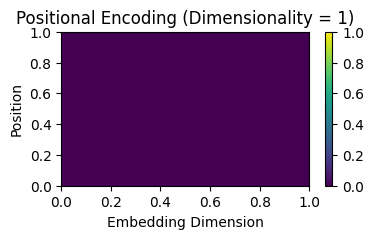

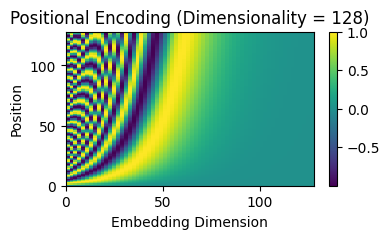

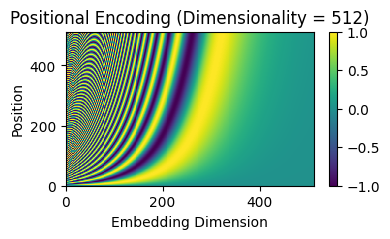

In [78]:
# Visualize positional encodings
dimensions = [1, 128, 512]
for dim in dimensions:
  pos_encoding = positional_encoding(dim)
  plt.figure(figsize=(4,2))
  plt.pcolormesh(pos_encoding, cmap='viridis')
  plt.xlabel('Embedding Dimension')
  plt.xlim((0, dim))
  plt.ylabel('Position')
  plt.colorbar()
  plt.title(f'Positional Encoding (Dimensionality = {dim})')
  plt.show()


what do we understand from positional encoding ?
suppose lets say we enter any string or a word that you input to the system ,what it does is these string inputed the model tries to understand the text and then tokenize the words that are present in input these inputs lets say category of dogs
and category of cats  once the text that is tokenized it will be encoded in the form of 2 or 3 dimensional vectors and then these vectors are plotted using sin and cosine
why sin and cosine ?
sine and cosine is used to find the realation between the text that is inputed by the user in order to find the relationship between those words how well it is accurately predicted.